# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

np.random.seed(5)
%matplotlib inline

In [3]:
np.unique(digits['target'])

array([0, 1, 2])

設定 模型 估計參數

In [4]:
pca = decomposition.PCA(n_components=3)

資料建模 並 視覺化 結果

- plt.cla() clears an axis，即当前图形中的当前活动轴。它使其他轴不受影响。
- plt.clf() clears the entire current figure与其所有轴，但是窗口打开，这样它可以被重复使用其他地块。
- plt.close() closes a window，如果没有指定，它将是当前窗口。

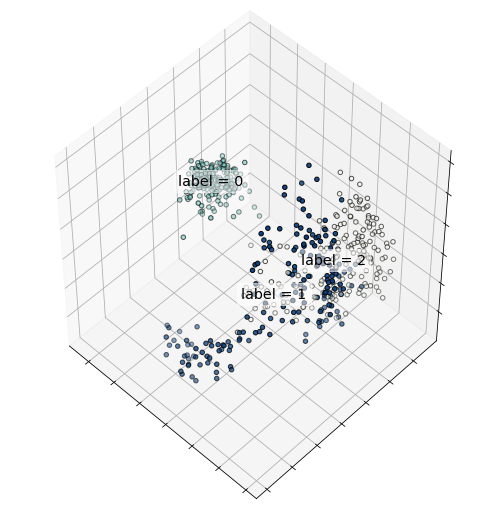

In [5]:
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(7, 7))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

for name, label in [('label = 0', 0), ('label = 1', 1), ('label = 2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),
              fontsize='x-large'
             )

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='GnBu',
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()